<a href="https://colab.research.google.com/github/pvanand07/EDA-Hotel-Booking-Python/blob/master/EDA_Hotel_Booking_Analysis_Almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    **Hotel Booking Analysis** 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Submitted By**    - Anand Siva P V  


# **Project Summary -**

This project aims to conduct an exploratory data analysis (EDA) on a dataset of hotel bookings to gain insights on booking patterns and customer behaviour. The analysis will focus on dentifying patterns in bookings and cancellations, customer demographics and preferences, and the effectiveness of different distribution channels.\
The dataset used for this project is available here.\
 [Built using jupyter notebook and Python 3]

# **GitHub Link -**

https://github.com/pvanand07/EDA-Hotel-Booking-Python/blob/master/EDA_Hotel_Booking_Analysis_Almabetter.ipynb

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

 The business objectives that this project tries to achieve are 
- To gain a comprehensive understanding of booking patterns and customer behavior 
- Understand which amenities and services are most popular among guests
- Determine key drivers of occupancy, revenue, and customer satisfaction
- Form strategies for increasing occupancy, revenue and customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Load Dataset
#dataset = pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Hotel Booking/Hotel Bookings.csv')
dataset = pd.read_csv("Hotel Bookings.csv")

### Dataset First View

In [ ]:
# Dataset First Look- Top 4 rows
dataset.head(4).T

,0,1,2,3
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0
lead_time,342,737,7,13
arrival_date_year,2015,2015,2015,2015
arrival_date_month,July,July,July,July
arrival_date_week_number,27,27,27,27
arrival_date_day_of_month,1,1,1,1
stays_in_weekend_nights,0,0,0,0
stays_in_week_nights,0,0,1,1
adults,2,2,1,1


In [ ]:
# Dataset First Look- Bottom 4 rows
dataset.tail(4).T

,119386,119387,119388,119389
hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0
lead_time,102,34,109,205
arrival_date_year,2017,2017,2017,2017
arrival_date_month,August,August,August,August
arrival_date_week_number,35,35,35,35
arrival_date_day_of_month,31,31,31,29
stays_in_weekend_nights,2,2,2,2
stays_in_week_nights,5,5,5,7
adults,3,2,2,2


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Dataset Rows :{} \nDataset Columns :{}'.format(dataset.shape[0],dataset.shape[1]))


Dataset Rows :119390 
Dataset Columns :32


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])/dataset.shape[0]

0.26797889270458164

## Define DF

In [ ]:
# Dropping Duplicate Values
df = dataset.drop_duplicates().reset_index(drop = True)
df.shape


(87396, 32)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


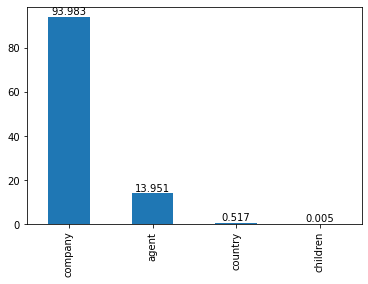

In [ ]:
# Finding percentage of missing values
df_nan_perc = df.isna().sum().sort_values(ascending = False)*100/len(df)

# Visualizing the missing values
df_nan_perc = df_nan_perc[df_nan_perc!=0].round(3)
df_nan_perc.plot.bar()
# Adding text on top of bars
for idx,y in enumerate(df_nan_perc):
    plt.text(idx,y+1,y, ha ='center')

- From the above visualisation we can see that more than 90% of the data is missing from the `'company'` column and also some data is missing from three other columns as well.
- We can drop the `'company'` and `'agent'`column.
- We can drop the missing rows from columns `'country'` and `'children'`.

## Define DF_1

In [ ]:
#Droping missing values
df_1 =   df.drop(['company','agent'],axis = 1).dropna().reset_index(drop = True)
print('Shape of the dataset before cleaning :',dataset.shape)
print('Shape of the dataset after cleaning :',df_1.shape)


Shape of the dataset before cleaning : (119390, 32)
Shape of the dataset after cleaning : (86940, 30)


In [ ]:
df[(df.adults+df.babies+df.children)==0].shape

(166, 32)

### What did you know about your dataset?

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## ***2. Understanding Your Variables***

#### Useless

In [ ]:
# Dataset Columns
df_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86940.0,0.275903,0.446971,0.00,0.00,0.0,1.0,1.0
lead_time,86940.0,80.193375,86.100147,0.00,12.00,50.0,125.0,737.0
arrival_date_year,86940.0,2016.211824,0.686016,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,86940.0,26.841477,13.654505,1.00,16.00,27.0,37.0,53.0
arrival_date_day_of_month,86940.0,15.818024,8.834469,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,86940.0,1.007396,1.028763,0.00,0.00,1.0,2.0,16.0
stays_in_week_nights,86940.0,2.628744,2.043753,0.00,1.00,2.0,4.0,41.0
adults,86940.0,1.878525,0.625860,0.00,2.00,2.0,2.0,55.0
children,86940.0,0.139211,0.456786,0.00,0.00,0.0,0.0,10.0
babies,86940.0,0.010835,0.113592,0.00,0.00,0.0,0.0,10.0


- Cancellation rate: The is_canceled feature has a mean of 0.27, which suggests that approximately 27% of bookings are cancelled. This could be an important metric, as it could indicate issues with overbooking or customer dissatisfaction.

- Lead time: The mean lead time of 80 days suggests that on average, customers book their stay about 80 days in advance. This could be useful for the hotel to know when planning for staffing and room inventory.

- Room occupancy: The mean number of adults per booking is 1.87, children is 0.14, and babies is 0.01. This could indicate the typical composition of guests staying in the hotel, and could inform decisions such as room size and amenities offered.

- Repeat guests: The is_repeated_guest feature has a mean of 0.04, which suggests that only 4% of guests are repeat customers. This could indicate a need for the hotel to focus on customer retention or improving the guest experience.

- Special requests: The total_of_special_requests feature has a mean of 0.7, which suggests that on average, guests make about 0.7 special requests per booking. This could be useful for the hotel to know when planning for staffing and resources.

- Booking Changes: The booking_changes feature has a mean of 0.27, this could indicate that guests are frequently changing their bookings, which could indicate issues with customer service or flexibility with the booking process.

- Average Daily Rate: The mean of ADR is 106.57,this would be useful for the hotel to know when planning for pricing strategy.

Additionally we can see that the max adr is 5400, max days in waiting list is 391 days, max lead time is 737 days which could be outliers, which can be addressed in the data cleaning section of this project.  

### Variables Description 

| Field | Description |
| --- | --- |
| hotel | H1= Resort Hotel H2=City Hotel |
| is_cancelled | "If the booking was cancelled(1) or not(0)" |
| lead_time | "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date" |
| arrival_date_year | Year of arrival date |
| arrival_date_month | Month of arrival date |
| arrival_date_week_number | Week number for arrival date |
| arrival_dat_day | Day of arrival date |
| stays_in_weekend_nights | "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel" |
| stays_in_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | Number of adults | 
| children | Number of children |
| babies | Number of babies |
| meal | Kind of meal opted |
| country | Country code | 
| market_segment | "Which segment the customer belongs to" |
|  Distribution _channel | "How the customer accessed the stay-corporate booking/Direct/TA.TO" |  
|  is_repeated_guest | Guest coming for first time or not |  
|  previous_cancellation | Was there a cancellation before |  
|  previous_bookings | Count of previous bookings |  
|  reserved_room_type | Type of room reserved |  
|  assigned_room_type | Type of room assigned |  
|  booking_changes | Count of changes made to booking |  
|  deposit_type | Deposit type |  	
|  agent | Booked through agent |  
|  days_in_waiting_list | Number of days in waiting list |  
|  customer_type | Type of customer |  
|  required_car_parking | If car parking is required |  
|  total_of_special_req | "Number of additional special requirements" |  
|  reservation_status | Reservation of status |  
|  reservation_status_date | Date of the specific status |  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_1_unique = df_1.nunique().sort_values()

In [ ]:
# Print only unique values that are less than 13
unique_8 = df_1_unique[df_1_unique < 13].index
for column in unique_8:
  print('Unique values in {:28}:'.format(column),df_1[column].unique())

Unique values in hotel                       : ['Resort Hotel' 'City Hotel']
Unique values in is_canceled                 : [0 1]
Unique values in is_repeated_guest           : [0 1]
Unique values in arrival_date_year           : [2015 2016 2017]
Unique values in deposit_type                : ['No Deposit' 'Refundable' 'Non Refund']
Unique values in reservation_status          : ['Check-Out' 'Canceled' 'No-Show']
Unique values in customer_type               : ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in required_car_parking_spaces : [0 1 2 8 3]
Unique values in distribution_channel        : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in children                    : [ 0.  1.  2. 10.  3.]
Unique values in babies                      : [ 0  1  2 10  9]
Unique values in meal                        : ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in total_of_special_requests   : [0 1 3 2 4 5]
Unique values in market_segment              : ['Direct

## 3. ***Data Wrangling***

### Data Wrangling Code

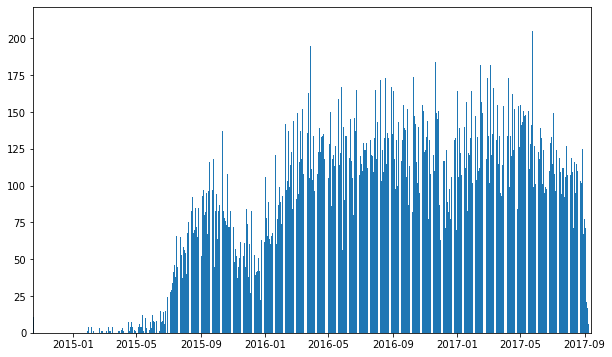

In [ ]:
# Write your code to make your dataset analysis ready.
# To check the distribution of data points we can use a countplot

# Converting the date column in 'df_1' to a datetime data type using pd.to_datetime() function.
df_1['reservation_status_date'] = pd.to_datetime(df_1['reservation_status_date'])

# Count the number of values by date
counts = df_1['reservation_status_date'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Limit the x axis for better visualization
plt.xlim(pd.Timestamp('2014-10-17'), pd.Timestamp('2017-09-14'))

# Plot the bar plot
dates = counts.index
counts = counts.values
plt.bar(dates, counts)
plt.show()

- From the plot we can see that very little data points exists before '2015-05-01'. Including these data could skew our results. 
- Hence we are only including the data from '2015-05-01' to '2017-09-14'

#### Define DF_2

In [ ]:
df_2=df_1[(df_1['reservation_status_date']>pd.Timestamp('2015-05-01'))&((df_1['reservation_status_date']<pd.Timestamp('2017-09-14')))].reset_index(drop = True)

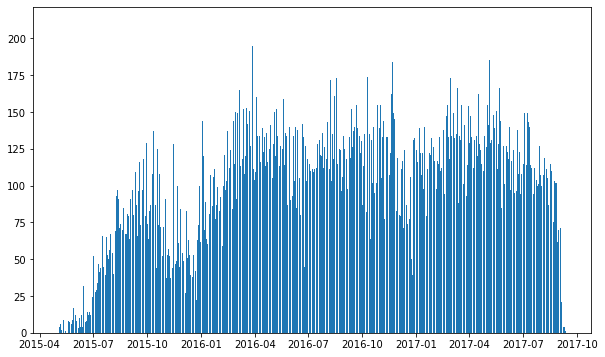

In [ ]:
# Visualizing the new selection of data points
# Get the counts
counts = df_2['reservation_status_date'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar plot
dates = counts.index
counts = counts.values
plt.bar(dates, counts)
plt.show()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

1. To understand the distribution of data in various categorical variables lets plot a percentage bar plot

0 arrival_date_month
1 meal
2 market_segment
3 distribution_channel
4 reserved_room_type
5 assigned_room_type
6 deposit_type
7 customer_type
8 reservation_status


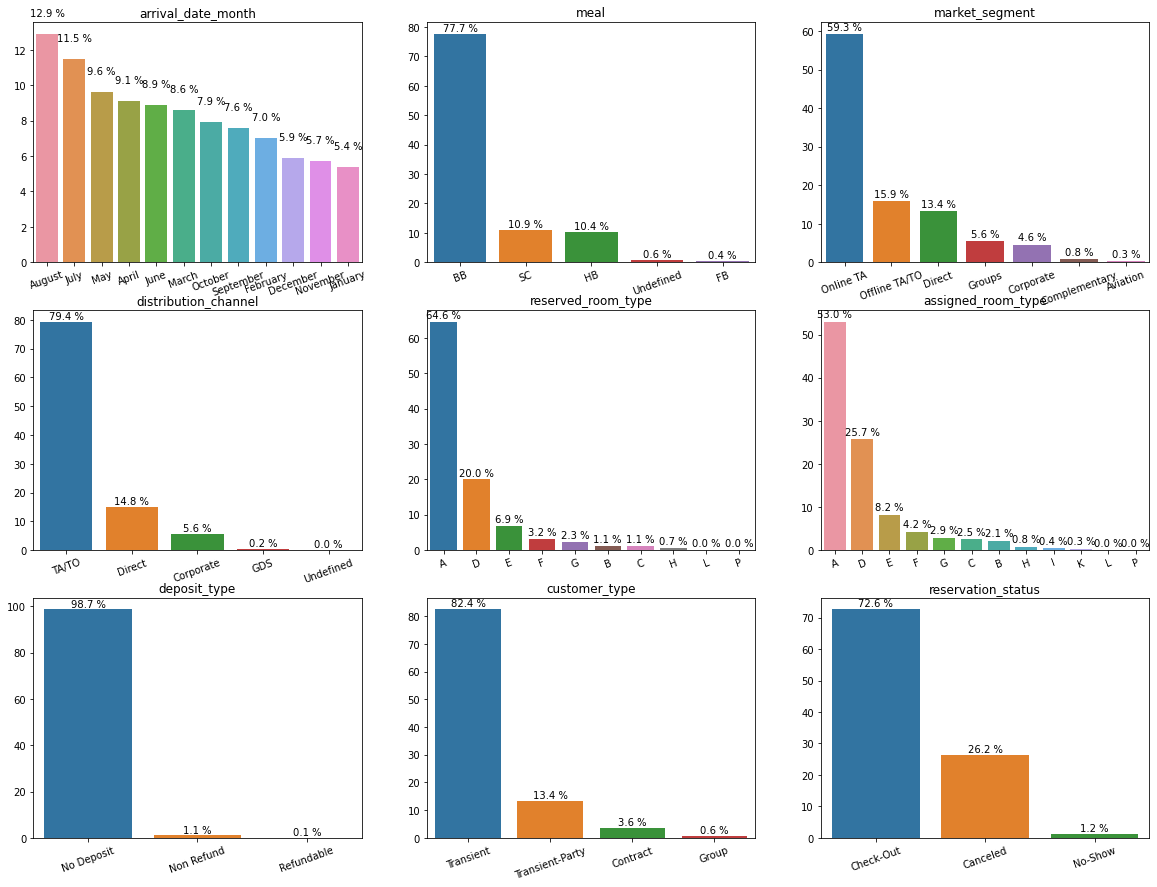

In [ ]:
#let's try to plot all the non numerical categorical columns. First let's remove columns 
#having too many categories, also the 'hotel' column to analyze later.  
cat_columns = df_2.select_dtypes(exclude=['int', 'float']).columns
cat_columns =list(cat_columns)
cat_columns.remove('reservation_status_date')
cat_columns.remove('country')
cat_columns.remove('hotel')
cat_columns

# set a larger figure size for subplots
plt.figure(figsize = [20  , 15]) 
for i,x in enumerate(cat_columns):
  print(i,x)
  # 3 row, 3 cols, subplot i+1 since subplot starts from 1
  plt.subplot(3, 3,i+1)
  # Get the value counts of the x column
  counts = (df_2[x].value_counts()*100/len(df_2)).round(1)
  
  # Create a barplot using the value counts
  sns.barplot(x=counts.index, y=counts.values, order = counts.index )
  plt.title(str(x)) 
  plt.xticks(rotation = 20)
  #plt.xlabel(str(x))
  for idx,y in enumerate(counts.values):
    plt.text(idx,y+1,'{} %'.format(y), ha ='center')
    #
plt.show()


- We can see that `24%` of total bookings occures during `july` and `August`. 
- While only `11%` of total bookings occures during `january` and `November`.
We can look into yearwise distributions later to see if this trend keeps up.
- The favourite meal is `BB   (Breakfast in Bed)` with `77%` of total orders
-`Online TA/TO` (Travel agent/Tour Operator) is the most prefered medium of bookings with the `59%` of total number of bookings
- `Room type A` is more prefered by the customer followed by `D` and `E`. `H` is the least prefered room. 
 Later we can check if the demand has a correlation with the price the room. 
- `No deposit bookings` account for the majority of bookings
- `Customer type transient` makes the majority of bookings followed by `Transient party` and `Contract type`

## **Univariate Analysis Questions**

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]








































































































































































+

#### 1. What is the trend of **bookings** over **month**, **week** and **day**?
#### Chart-1

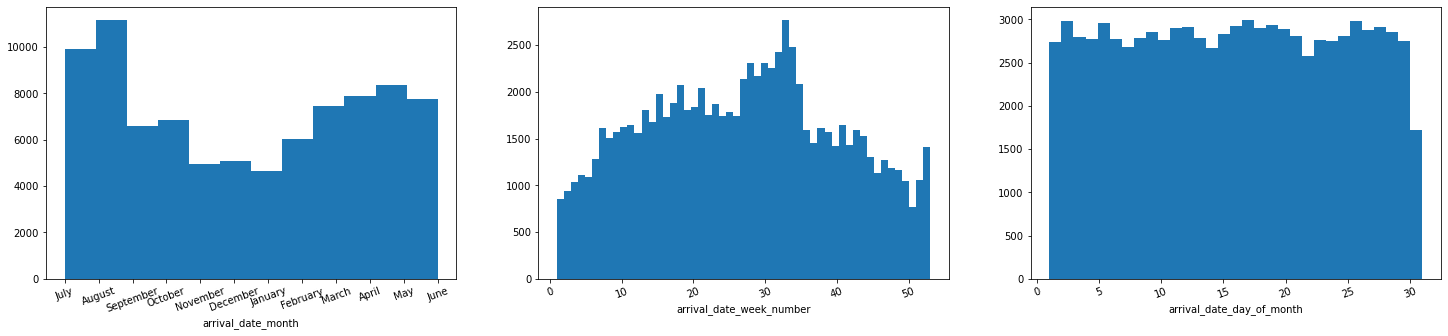

In [ ]:
cat_columns_ordinal =['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

# Create a figure with 3 subplots
plt.figure(figsize = [25, 5]) 

# 1 row, 3 cols, subplot 1
plt.subplot(1, 3, 1)
x=cat_columns_ordinal[0]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 12)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Subplot 2
plt.subplot(1, 3, 2)
# Assign the second column in the list to x
x=cat_columns_ordinal[1]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 53)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Subplot 3
plt.subplot(1, 3, 3)
x=cat_columns_ordinal[2]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 31)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Show the figure
plt.show()


##### 1. Why did you pick the specific chart?

Histograms helps us to see the distribution of data over categories or a period of time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Based on the data, it appears that bookings vary by season, with the highest number of bookings take place during the months of May, June, July, and August. 
- The months of November, December, January, and February tend to have the lowest levels of bookings."

##### 3. Will the gained insights help creating a positive business impact? 

- Identifying the periods of higher demand can help the management to prepare beforehand and allocate more resources
- Additionally strategies can be developed to address lower demand periods.

#### 4. Guest demographics

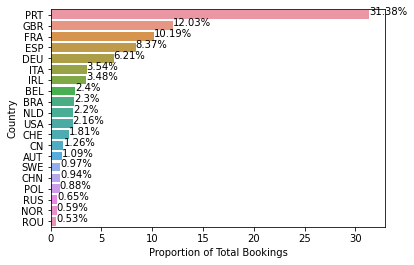

In [ ]:
# Get the top 20 countries based on the number of bookings and the proportion of total bookings
df_top = (df_2['country'].value_counts()[:20]*100/len(df_2)).round(2)

# Create a bar plot with the top countries on the y-axis and the proportion of bookings on the x-axis
sns.barplot(x=df_top.values, y=df_top.index)

# Add x-axis label
plt.xlabel('Proportion of Total Bookings')
# Add y-axis label
plt.ylabel('Country')

# Loop through the bars and add the percentage value above each bar
for idx,y in enumerate(df_top.values):
    plt.text(y,idx,str(y)+'%', ha ='left')     
# Show the plot
plt.show()


#### 2. What is the **percentage of cancellations?**
#### Chart - 2

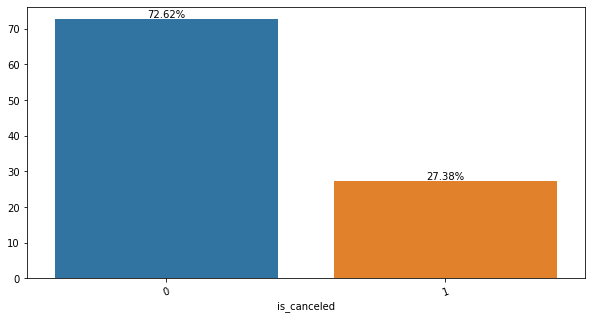

In [ ]:
# Chart - 2 visualization code
#identify percentage of cancellations

# Get percentage of value counts for 'arrival_date_month' column
counts = (df_2['is_canceled'].value_counts()*100/len(df_2)).round(2)

# Set figure size
plt.figure(figsize = [10  , 5])   

# Create a barplot using the value counts
sns.barplot(x=counts.index, y=counts.values, order = counts.index )

#Rotate x-tick labels for easier reading, add x-label
plt.xticks(rotation = 20)
plt.xlabel('is_canceled')

#Add value count labels on top of each bar
for idx,y in enumerate(counts.values):
  
  #plt.text(x_co-ord, y_co-ord, value, ha(horrizontal alignment))
  plt.text(idx,y+0.5,str(y)+'%', ha ='center') 
plt.show()







##### 1. Why did you pick the specific chart?

A bar chart makes it easier compare the different categories. Here it helps to visualize and compare the proportion of bookings that were cancelled

##### 2. What is/are the insight(s) found from the chart?

- From the chart we an see that a good portion (`27%`) of the bookings were cancelled which leads to loss of revenue

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The cancellations can lead to negative growth due to a decrease in revenue. Further analysis can be conducted to identify the reason/sources of high cancellations

#### 3. What is the **percentage of returning guests?**

<AxesSubplot:ylabel='None'>

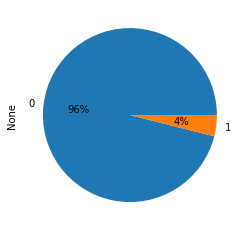

In [ ]:
# Create a pie plot of the is_repeated_guest variable
df_1.groupby('is_repeated_guest').size().plot(kind='pie', y=['1','2'],autopct='%1.0f%%')
# Show the plot
#plt.show()

## **Bivariate Analysis**

#### 4. Which Hotel generates highest ADR?
#### Chart - 4

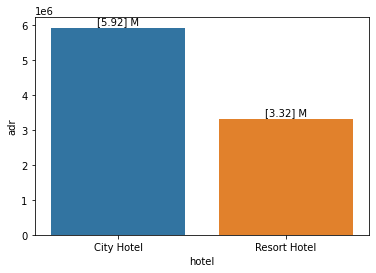

In [ ]:
# Chart - 2 visualization code

group_1 = pd.DataFrame(df_2[['hotel','adr']].groupby(['hotel']).sum())
# Grouping returns a multi-index pandas series. Use pd.DataFrame to convert to a dataframe
sns.barplot(data = group_1, x=group_1.index,y='adr')
#Add value count labels on top of each bar
for idx,y in enumerate(group_1.values):
  
  #plt.text(x_co-ord, y_co-ord, value, ha(horrizontal alignment))
  plt.text(idx,y+(10**5),str((y/10**6).round(2))+' M', ha ='center') 
plt.show()

##### 1. Why did you pick the specific chart?

Here the Bar chart helps us to easily visualize and compare the difference in revenue of the two hotels.

##### 2. What is/are the insight(s) found from the chart?

- City Hotel and Resort hotel has generated a revenue of `5.9 M Pounds` and `3.9 M pounds` respectively during the period `2015-05-01` - `2017-09-01`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 - Revenue is a key metric which is used to identify the performance of a hotel. This can help us in the further evaluations.

#### 5. How does average of ADR varies by Week, Month, Market Segment, Customer type and Room type?
#### Chart - 5

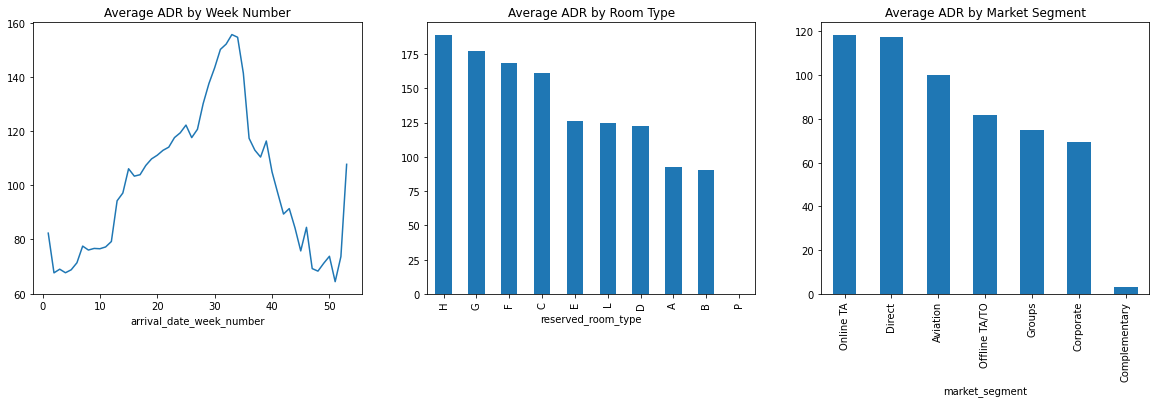

In [ ]:
plt.figure(figsize = [20  , 5])
plt.subplot(1,3,1)
df_2.groupby('arrival_date_week_number')['adr'].mean().plot()
plt.title("Average ADR by Week Number")

plt.subplot(1,3,2)
df_2.groupby('reserved_room_type')['adr'].mean().sort_values(ascending =False).plot(kind='bar')
plt.title("Average ADR by Room Type")

plt.subplot(1,3,3)
df_2.groupby('market_segment')['adr'].mean().sort_values(ascending =False).plot(kind='bar')
plt.title("Average ADR by Market Segment")

plt.show()

##### 1. Why did you pick the specific chart?

- Here the line chart helps to see the trend of ADR over time, while the bar chart helps to compare different categories.

##### 2. What is/are the insight(s) found from the chart?

- The peak in average `ADR` occurs during the `weeks 30-35` which can be correlated to high booking demand.
- This might be due to the hotels adjusting the room rates for the higher demand and increased sales of other amenities. 
- The rooms which generates the highest `ADR` are `H` followed `G`, and `F`
- The market segment which generates highest `ADR` are `Online Travel Agent` followed by `Direct Booking` and `Aviation`


##### 3. Will the gained insights help creating a positive business impact? 
- Since online TA generates high ADR the management can direct its marketing towards online mediums to increase its visibility on these platforms and potentially capture more bookings.

Answer Here

#### Chart 5.1 # Room type vs adr boxplot

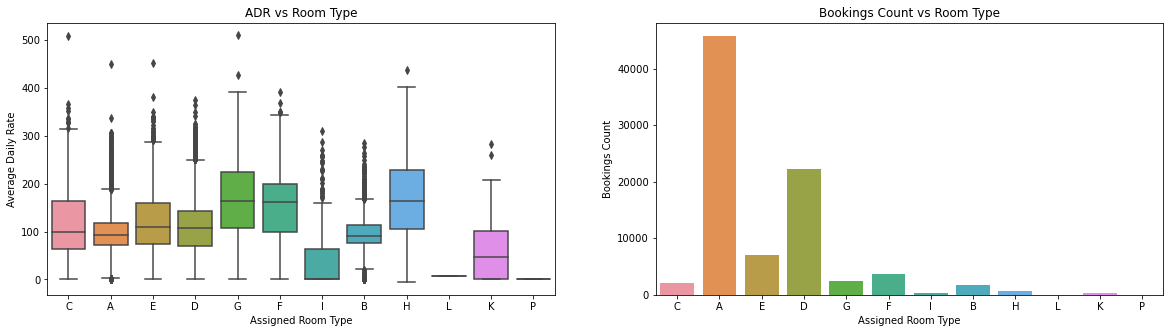

In [ ]:
df_2 = df_2[df_2['adr']<1000]

plt.figure(figsize=(20,5))

# First subplot
plt.subplot(1,2,1)
sns.boxplot(x='assigned_room_type', y='adr', data=df_2)
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate')
plt.title('ADR vs Room Type')

# Second subplot
plt.subplot(1,2,2)
sns.countplot(data=df_2, x='assigned_room_type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Bookings Count')
plt.title('Bookings Count vs Room Type')

plt.show()


#### 6. Which hotel has highest cancellations?
#### Chart - 6

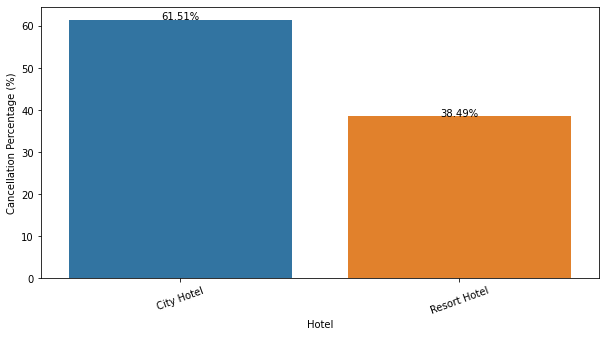

In [ ]:
# Get percentage of cancellations for each hotel
counts = (df_2.groupby('hotel')['is_canceled'].count() * 100 / len(df_2)).round(2)

# Set figure size
plt.figure(figsize=[10,5])

# Create a barplot of cancellation percentages for each hotel
sns.barplot(x=counts.index, y=counts.values)

# Rotate x-tick labels 
plt.xticks(rotation=20)

# Add x and y labels
plt.xlabel('Hotel')
plt.ylabel('Cancellation Percentage (%)')

# Add value count labels on top of each bar
for i, v in enumerate(counts.values):
    plt.text(i, v, f'{v}%', ha='center')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Here barchart helps us compare and visualize differences in percentage of cancellations in each hotel

##### 2. What is/are the insight(s) found from the chart?

We can observe that that City Hotels have a higher percentage of cancellations compared to Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe a majority of bookings (>60%) of City Hotel is being cancelled. We can try to identify the reasons for this in our further analysis.

#### 7. How does cancellation rate varies by Room Type? 
#### Chart - 7 stacked bar chart with %

"# Get percentage of cancellations for each market segment\nplt.subplot(2, 3, 4)\ncancelled_segments = (df_2.groupby('market_segment')['is_canceled'].sum() * 100 / len(df_2)).round(2).plot(kind ='bar')\nplt.title('Cancellation across Market Segment')\nplt.show()"

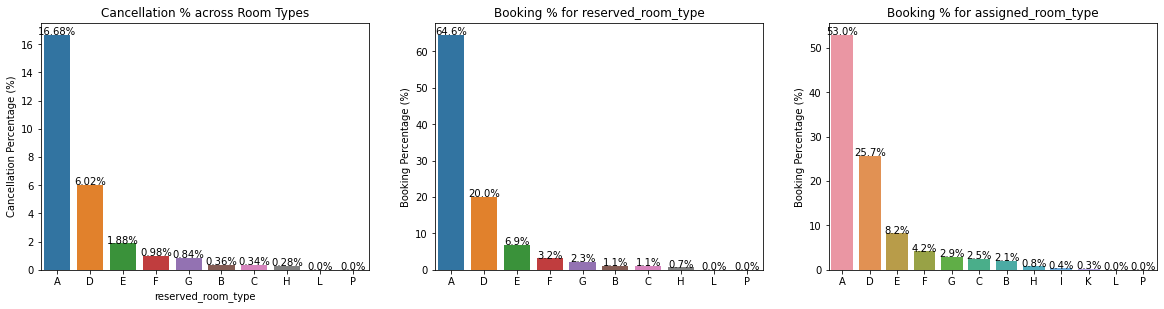

In [ ]:
plt.figure(figsize=[20,10])

# Subplot for Cancelled Room Types
plt.subplot(2, 3, 1)
cancelled_rooms = (df_2.groupby('reserved_room_type')['is_canceled'].sum() * 100 / len(df_2)).round(2).sort_values(ascending=False)
sns.barplot(x=cancelled_rooms.index, y=cancelled_rooms.values)
plt.title('Cancellation % across Room Types')
plt.ylabel('Cancellation Percentage (%)')
for i, v in enumerate(cancelled_rooms.values):
    plt.text(i, v, f'{v}%', ha='center')

# Subplots for Room Type Distribution
room_types = ['reserved_room_type', 'assigned_room_type']
for i, col in enumerate(room_types):
    plt.subplot(2, 3, i+2)
    counts = (df_2[col].value_counts() * 100 / len(df_2)).round(1)
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Booking % for '+str(col))
    plt.ylabel('Booking Percentage (%)')
    for j, val in enumerate(counts.values):
        plt.text(j, val, f'{val}%', ha='center')


"""# Get percentage of cancellations for each market segment
plt.subplot(2, 3, 4)
cancelled_segments = (df_2.groupby('market_segment')['is_canceled'].sum() * 100 / len(df_2)).round(2).plot(kind ='bar')
plt.title('Cancellation across Market Segment')
plt.show()"""

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- Cancellations are higher for room A followed by D and E
- From the booking percentages can see the shift of provided rooms from A to D and E. Hence we can conclude that room type A is getting cancelled due to the lack of availability.
- Also we can observe cancellation rates are the highest for online TA (>20%)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 8. How does cancellation rate varies by market segment? 
#### Chart 8

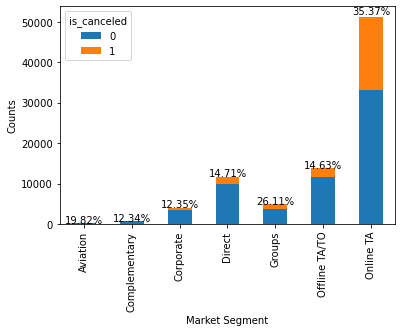

is_canceled,0,1
market_segment,,
Aviation,182,45
Complementary,611,86
Corporate,3527,497
Direct,9866,1702
Groups,3592,1269
Offline TA/TO,11717,2008
Online TA,33139,18133


In [ ]:
# Creating a crosstab of market_segment and is_canceled columns
df_2_crosstab = pd.crosstab(df_2['market_segment'], df_2['is_canceled'])

# Plotting the crosstab in a stacked bar chart
df_2_crosstab.plot(kind='bar',stacked=True)

# Adding the percentage values of cancellations on top of each bar
ax = plt.gca()
for i,x in enumerate(df_2_crosstab.values):
    plt.text(i, (x[0]+x[1])*1.01, '{:.2%}'.format(x[1]/(x[0]+x[1])), ha='center')
    
ax.set_ylabel("Counts")
ax.set_xlabel("Market Segment")
ax.legend(title='is_canceled')
plt.show()
df_2_crosstab

- It appears that the market segments with the highest percentage of cancellations are 'Complementary', 'Offline TA/TO', and 'Online TA' with 13.6%, 15.6%, and 35.4% respectively. 
- While 'Aviation', 'Corporate', 'Direct' and 'Groups' have a lower percentage of cancellations with 4.8%, 12.4%, 15.4% and 26.2% respectively.

#### 9. How does ADR and number of bookings varies over time?
#### Chart 9

<AxesSubplot:xlabel='reservation_status_date'>

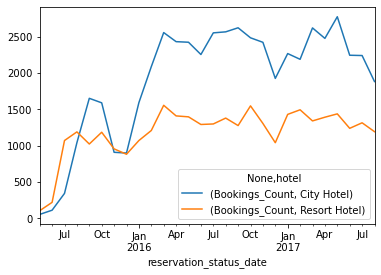

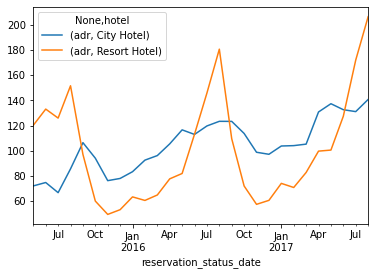

In [ ]:
# Calculating the count of bookings by month using pd.Grouper
bookings_by_month = df_2[['reservation_status_date','adr','hotel']].rename(columns={'adr':'Bookings_Count'})
bookings_by_month = bookings_by_month.groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).count()
bookings_by_month.unstack().plot()
# Calculating the average of adr generated by month using pd.Grouper
adr_by_month = df_2[['reservation_status_date','adr','hotel']].groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).mean()
adr_by_month.unstack().plot()


- From these tables, we can see that there are more bookings and higher ADR for City Hotels compared to Resort Hotels. Additionally, it appears that bookings and ADR for both City and Resort Hotels peak in the months of July and August.

- It also appears that the ADR for City Hotels is consistently higher than that of Resort Hotels. This could indicate that City Hotels are able to charge higher rates for their rooms.

- We can also observe that there is a increasing trend in the ADR for both city and resort hotels throughout the years.

- Overall, these insights can help hotel managers to make strategic decisions such as adjusting room prices and allocating enough resources to optimize revenue during high-demand periods.

In [ ]:
# Chart - 8 visualization code
"""columns = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list']
for column in columns:
  #group_1 = df_2[['is_repeated_guest','total_of_special_requests']]
  sns.stripplot(data = df_2,y=column,x='is_repeated_guest')
  plt.show()"""
sns.stripplot(data = df_2,y=column,='is_repeated_guest')

SyntaxError: invalid syntax (3032250772.py, line 10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 9. Does market segment affects Booking changes?
#### Chart - 9

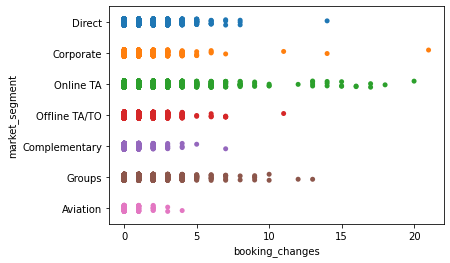

In [ ]:
# Chart - 9 visualization code
sns.stripplot(data = df_2,y='market_segment',x='booking_changes')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 10. Is there any relationship between Lead Time and Cancellation Rate?
#### Chart - 10

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

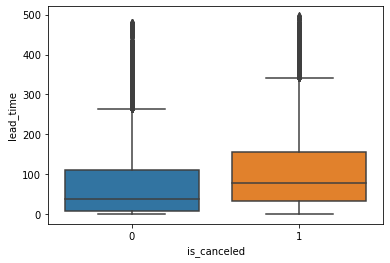

In [ ]:
# Chart - 10 visualization code
df_2 = df_2[df_2['lead_time']<500]
sns.boxplot(data = df_2, x='is_canceled',y='lead_time')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 10. Is there any relationship between Deposit type and Cancellation Rate?
#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 11. Duration  of stay over weeks?
#### Chart - 11

<AxesSubplot:xlabel='reservation_status_date', ylabel='Total_stay_duration'>

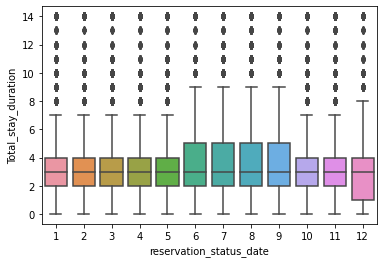

In [ ]:
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']
df_2 = df_2[df_2['Total_stay_duration']<15].reset_index(drop = True)
sns.boxplot(x=df_2['reservation_status_date'].dt.month,y='Total_stay_duration',data = df_2)

C:\Users\pvana\AppData\Local\Temp\ipykernel_1448\757554975.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.lineplot(x=df_2['reservation_status_date'].dt.week,y='Total_stay_duration',data = df_2);


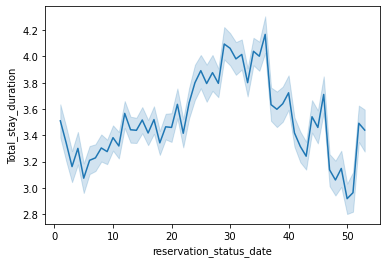

In [ ]:
# Chart - 11 visualization code
# Total stay duration vs adr sns.scatterplot
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']
df_2 = df_2[df_2['Total_stay_duration']<15].reset_index(drop = True)
sns.lineplot(x=df_2['reservation_status_date'].dt.week,y='Total_stay_duration',data = df_2);
#plt.plot(df_2['reservation_status_date'].dt.week,df_2['Total_stay_duration'])

C:\Users\pvana\AppData\Local\Temp\ipykernel_1916\785389003.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = df_2['reservation_status_date'].dt.week
C:\Users\pvana\AppData\Local\Temp\ipykernel_1916\785389003.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.scatterplot(x=df_2['reservation_status_date'].dt.week,y='Total_stay_duration',data = df_2);


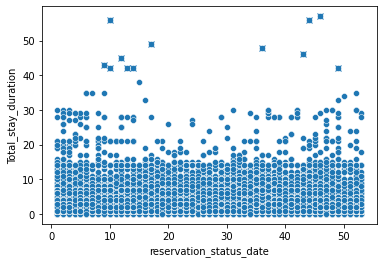

In [ ]:
from scipy.signal import find_peaks

week = df_2['reservation_status_date'].dt.week
duration = df_2['Total_stay_duration']

peaks, _ = find_peaks(duration, height = 40, distance = 5)
#sns.lineplot(x=week, y=duration)
sns.scatterplot(x=df_2['reservation_status_date'].dt.week,y='Total_stay_duration',data = df_2);
plt.plot(week[peaks], duration[peaks], "x")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Duration increases upto approx 35th week then decreases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 12. Duration of stay vs ADR?
#### Chart - 12 /chat compare two numerical variables plots - 1.scatter

In [ ]:
# Removing outlier in adr
df_2 = df_2[df_2['adr']<1000]

C:\Users\pvana\AppData\Local\Temp\ipykernel_12924\82900815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']


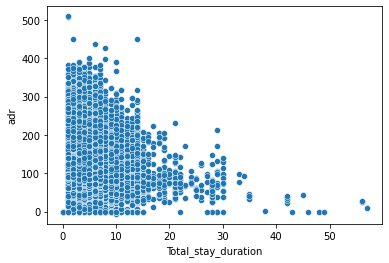

In [ ]:
# Chart - 12 visualization code
# Total stay duration vs adr sns.scatterplot
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']
sns.scatterplot(x='Total_stay_duration',y='adr',data = df_2);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Multi Variate Visualization

#### Chart - 14

hotel             City Hotel       Resort Hotel      
is_canceled                0     1            0     1
arrival_date_year                                    
2015                    5128  1321         5379  1123
2016                   18969  7772        11950  3400
2017                   13270  6806         8225  3271

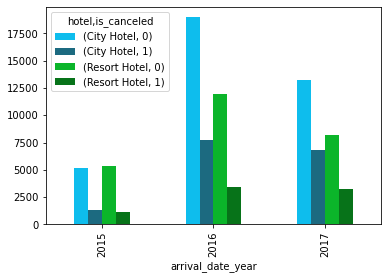

In [ ]:
# Chart - 13 visualization code
pivot_1 = pd.pivot_table(df_2, index=['arrival_date_year'], columns=['hotel','is_canceled'], aggfunc='size')
pivot_1.plot(kind ='bar',color=['#0ebded','#1c6a80','#0bb52a','#077319'])
pivot_1

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- We can observe the trend in number of bookings using the above chart
- There seems to be an overall increase in the number of bookings in the year 2016 followed by a decrease in 2017.
- The number of cancellations also seems to follow the same pattern. 
-In the following sections we can look into the factors which affect the cancellation rate and number of bookings. Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - ADR vs No. of bookings vs hotel  over time- Line plot and bar plot combined

In [ ]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Pair Plot 

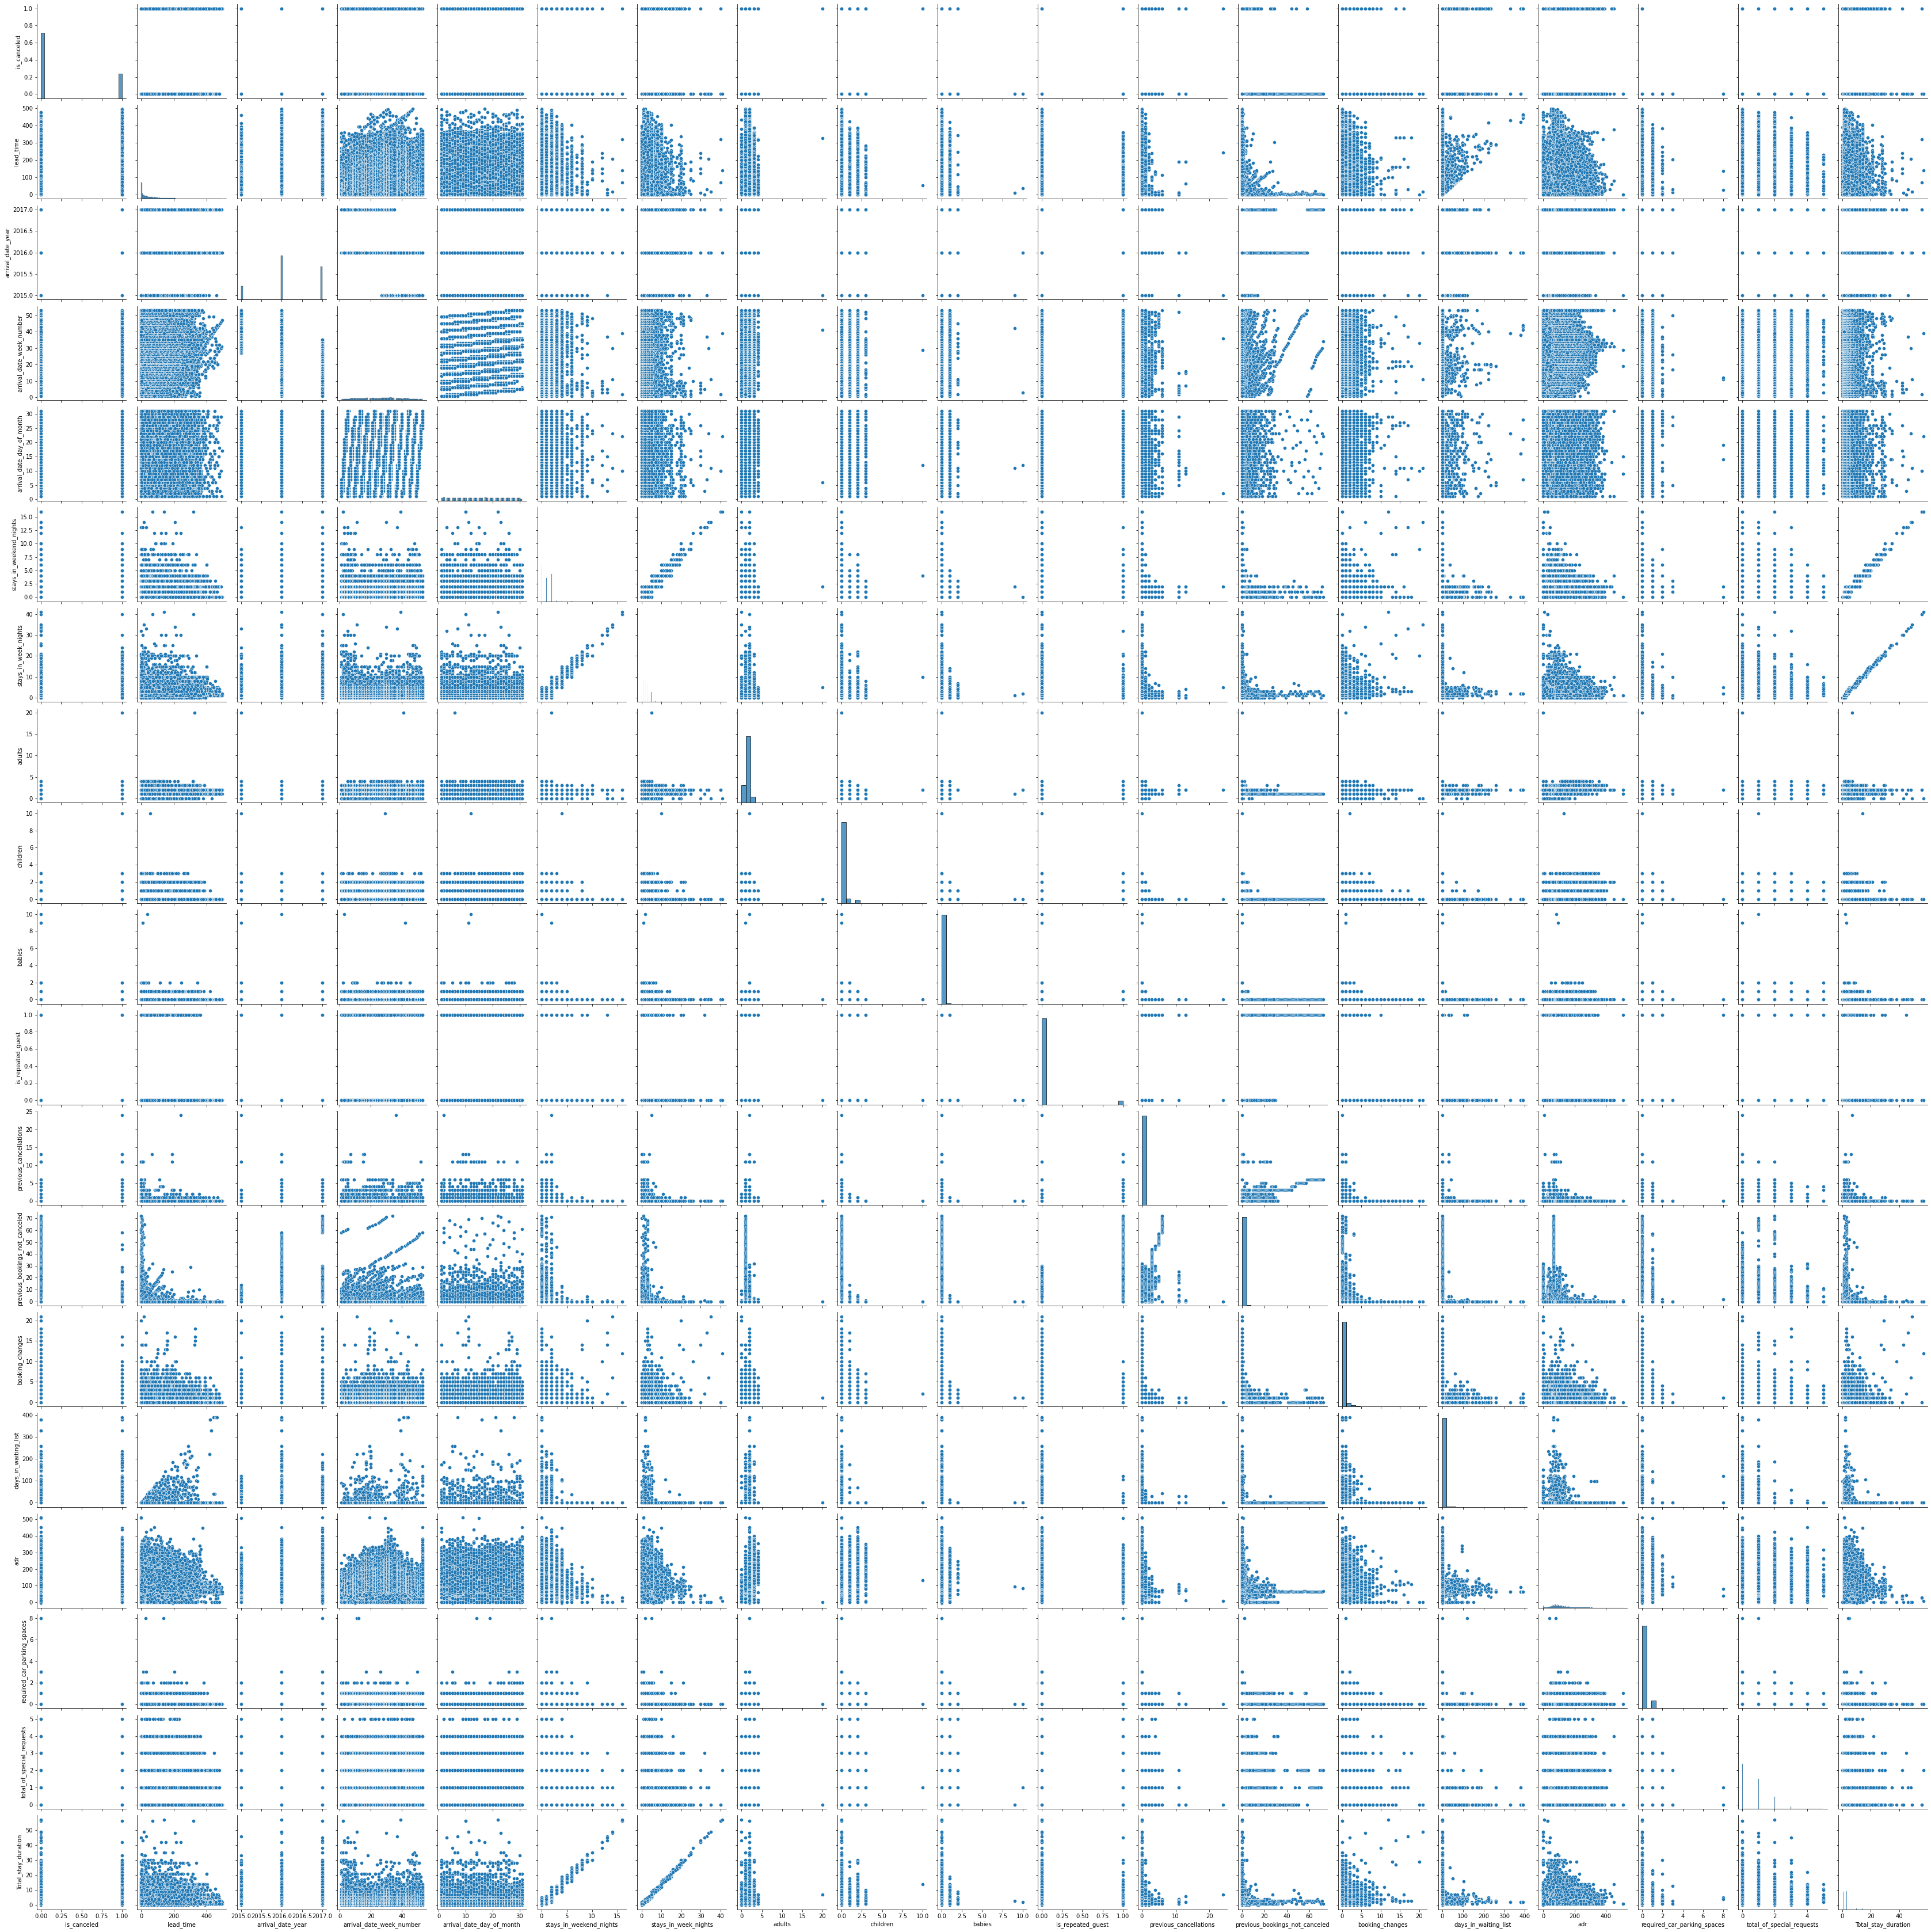

In [ ]:
# Pair Plot visualization code

# Create the pair plot
sns.pairplot(data=df_2, kind='scatter')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14 - Correlation Heatmap

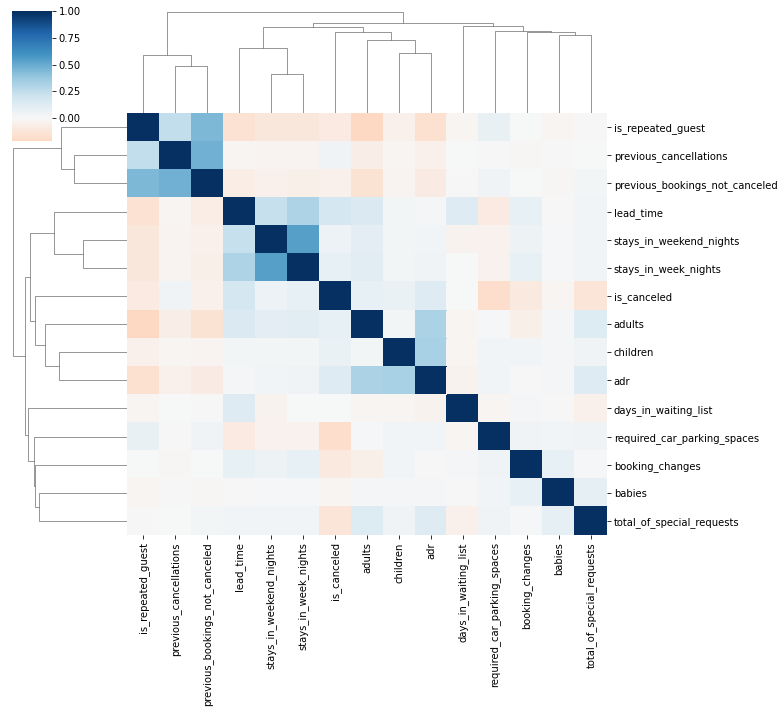

In [ ]:
# Correlation Heatmap visualization code
df_3 = df_2.drop(['arrival_date_day_of_month', 'arrival_date_year',
                  'arrival_date_month', 'arrival_date_week_number'], axis=1)
sns.clustermap(df_3.corr(),cmap='RdBu',center=0,figsize=(11, 10))

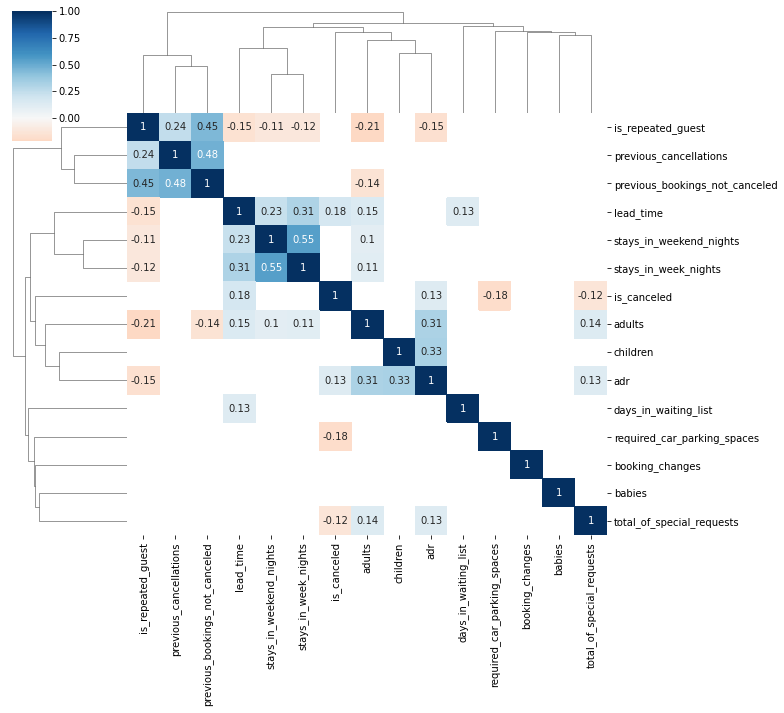

In [ ]:
#sorted correlation chart of numerical values

mask = (df_3.corr() < 0.1)&(df_3.corr() > -0.1)
sns.clustermap(df_3.corr(),cmap='RdBu',center=0,figsize=(11, 10),annot=True,mask=mask)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- `adr` seems to be positively correlated with children,adults,total_of_special_requests,is_cancelled
- `lead_time` seems to be positively correlated with stays_in_weeknd_nights,stays_in_week_nights 
- `is_repeated_guest` seems to be negatively correlated with adr, is_cancelled,lead_time
-is cancelled seems to be positively correlated with lead_time and adr also negatively correlaed with total_of_special_requests
Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

## Code dump

C:\Users\pvana\AppData\Local\Temp\ipykernel_1916\982104587.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = df_2['reservation_status_date'].dt.week


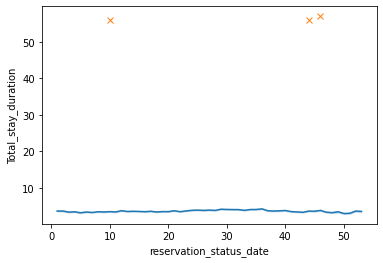

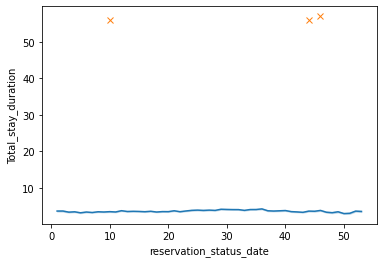

In [ ]:
duration[peaks]

11        4
27       15
47       14
58        3
80       14
         ..
86662     6
86667     8
86671    10
86675     6
86677     6
Name: Total_stay_duration, Length: 16976, dtype: int64

#### 3. ?
#### Chart - 3

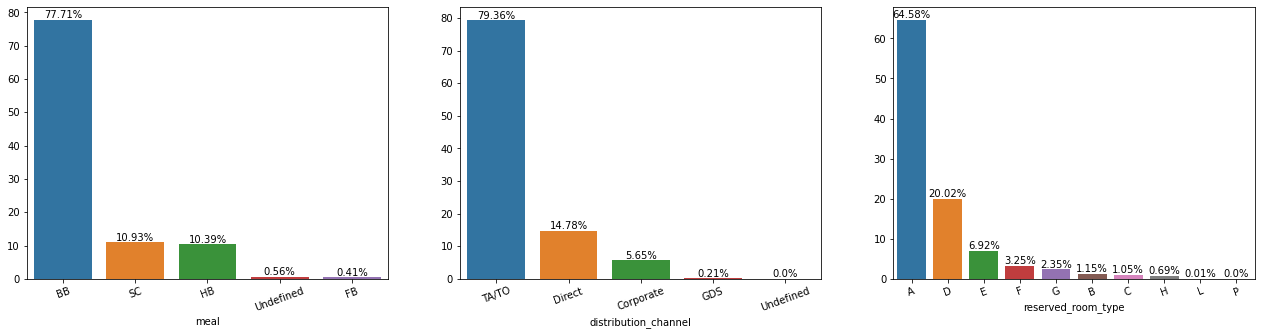

In [ ]:
# Chart - 3 visualization code
customer_columns =["meal","distribution_channel","reserved_room_type"]

# set a larger figure size for subplots
plt.figure(figsize = [22  , 5]) 
for i,x in enumerate(customer_columns):
  
  # 1 row, 3 cols, subplot i+1 since subplot starts from 1
  plt.subplot(1, 3,i+1)
  # Get the value counts of the x column
  counts = (df_2[x].value_counts()*100/len(df_2)).round(2)
  
  # Create a barplot using the value counts
  sns.barplot(x=counts.index, y=counts.values, order = counts.index )
  
  plt.xticks(rotation = 20)
  plt.xlabel(str(x))
  for idx,y in enumerate(counts.values):
    plt.text(idx,y+0.5,str(y)+'%', ha ='center') 
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 3. ?
#### Chart - 3

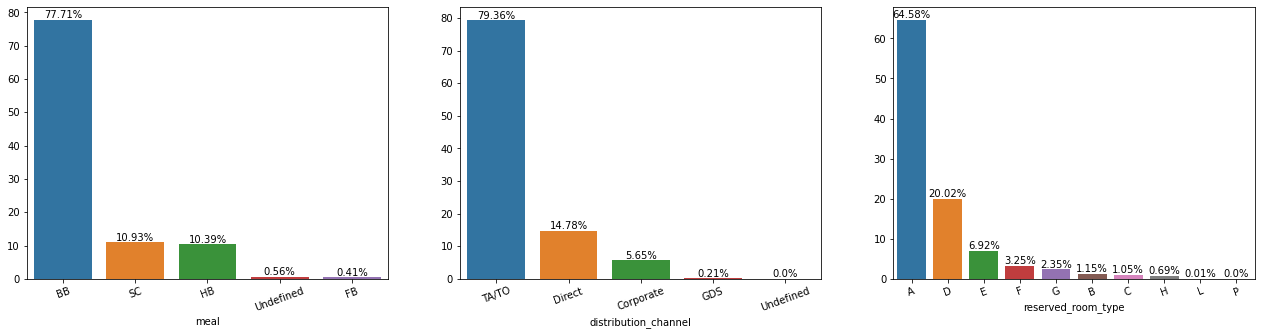

In [ ]:
# Chart - 3 visualization code
customer_columns =["meal","distribution_channel","reserved_room_type"]

# set a larger figure size for subplots
plt.figure(figsize = [22  , 5]) 
for i,x in enumerate(customer_columns):
  
  # 1 row, 3 cols, subplot i+1 since subplot starts from 1
  plt.subplot(1, 3,i+1)
  # Get the value counts of the x column
  counts = (df_2[x].value_counts()*100/len(df_2)).round(2)
  
  # Create a barplot using the value counts
  sns.barplot(x=counts.index, y=counts.values, order = counts.index )
  
  plt.xticks(rotation = 20)
  plt.xlabel(str(x))
  for idx,y in enumerate(counts.values):
    plt.text(idx,y+0.5,str(y)+'%', ha ='center') 
  
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here